In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('E:/PROJECTS/NN_from_scratch/train.csv')


In [3]:
data = np.array(data)
m, n = data.shape

# Shuffling before splitting into train and test sets
np.random.shuffle(data) 

data_test = data[0 : 1000].T
y_test = data_test[0]
x_test = data_test[1:n] / 255

data_train = data[1000 : m].T
y_train = data_train[0]
x_train = data_train[1:n] / 255

_, m = x_train.shape

In [4]:
y_train

array([3, 5, 8, ..., 3, 4, 7], shape=(41000,))

In [5]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return w1, b1, w2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [6]:
def forward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    
    return z1, a1, z2, a2

In [7]:
def ReLU_derivative(Z):
    return Z > 0

In [8]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [9]:
def backward_prop(z1, a1, z2, a2, w1, w2, X, Y):
    one_hot_Y = one_hot(Y)
    dz2 = a2 - one_hot_Y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * ReLU_derivative(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw1, db1, dw2, db2

In [10]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, lr):
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    return w1, b1, w2, b2

In [11]:
def get_pred(A2):
    return np.argmax(A2, 0)

def get_accuracy(pred, Y):
    print(pred, Y)
    return np.sum(pred == Y) / Y.size

def gradient_descent(X, Y, lr, epochs):
    w1, b1, w2, b2 = init_params()
    for i in range(epochs):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            pred = get_pred(a2)
            print(get_accuracy(pred, Y))
    return w1, b1, w2, b2

In [13]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 0.10, 500)

Iteration:  0
[9 9 8 ... 9 9 9] [3 5 8 ... 3 4 7]
0.14448780487804877
Iteration:  10
[8 9 8 ... 3 9 9] [3 5 8 ... 3 4 7]
0.2700975609756098
Iteration:  20
[3 3 8 ... 3 4 7] [3 5 8 ... 3 4 7]
0.33382926829268295
Iteration:  30
[3 3 8 ... 3 4 7] [3 5 8 ... 3 4 7]
0.3659268292682927
Iteration:  40
[3 3 8 ... 3 4 7] [3 5 8 ... 3 4 7]
0.4094390243902439
Iteration:  50
[3 3 8 ... 3 4 7] [3 5 8 ... 3 4 7]
0.45170731707317074
Iteration:  60
[3 3 8 ... 3 4 7] [3 5 8 ... 3 4 7]
0.48409756097560974
Iteration:  70
[3 3 8 ... 3 4 7] [3 5 8 ... 3 4 7]
0.5121707317073171
Iteration:  80
[3 3 8 ... 3 4 7] [3 5 8 ... 3 4 7]
0.5358048780487805
Iteration:  90
[3 3 8 ... 3 4 7] [3 5 8 ... 3 4 7]
0.5589756097560976
Iteration:  100
[3 3 3 ... 3 4 7] [3 5 8 ... 3 4 7]
0.5787073170731707
Iteration:  110
[3 3 3 ... 3 4 7] [3 5 8 ... 3 4 7]
0.5983414634146341
Iteration:  120
[3 5 3 ... 3 4 7] [3 5 8 ... 3 4 7]
0.6150243902439024
Iteration:  130
[3 5 3 ... 3 4 7] [3 5 8 ... 3 4 7]
0.6301463414634146
Iteration:  1

In [14]:
def make_pred(X, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, X)
    pred = get_pred(a2)
    return pred


In [15]:
def test_pred(index, w1, b1, w2, b2):
    curr = x_train[:, index, None]
    pred = make_pred(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", pred)
    print("Label: ", label)
    
    curr = curr.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(curr, interpolation = 'nearest')
    plt.show()

Prediction:  [3]
Label:  3


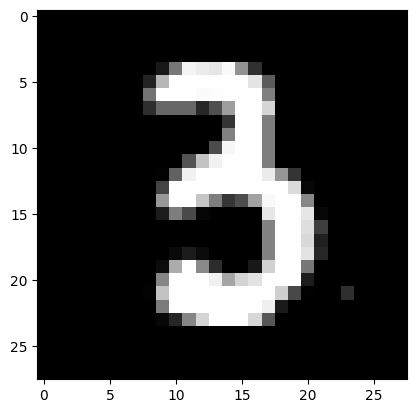

In [16]:
test_pred(0, w1, b1, w2, b2)

Prediction:  [8]
Label:  8


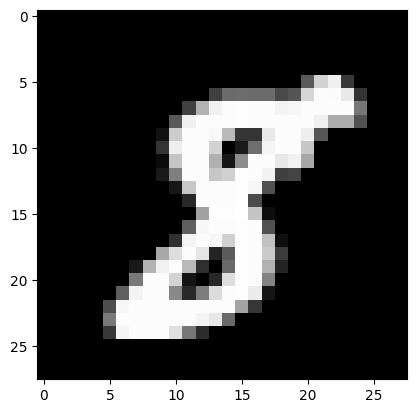

In [17]:
test_pred(100, w1, b1, w2, b2)

In [18]:
test_pred = make_pred(x_test, w1, b1, w2, b2)
get_accuracy(test_pred, y_test)

[0 7 1 0 9 0 8 5 2 4 0 0 0 9 6 3 9 5 9 8 6 3 9 4 4 4 2 4 0 7 6 9 4 6 5 7 6
 8 6 5 6 5 7 3 9 7 2 8 2 0 2 7 1 1 0 7 5 6 3 5 2 8 3 3 8 6 5 7 1 6 3 7 2 2
 1 7 7 7 7 0 4 8 5 4 9 1 9 0 1 4 4 2 4 4 9 9 2 7 1 7 2 0 9 1 3 0 6 5 6 9 6
 5 6 4 4 2 6 2 9 0 6 7 6 1 2 8 1 1 5 1 6 8 1 0 5 0 8 7 3 7 5 6 6 2 1 2 7 6
 9 6 2 8 3 1 8 1 9 8 2 8 8 8 1 0 3 0 0 2 9 3 7 4 9 2 4 7 3 6 2 3 3 6 6 8 4
 3 0 6 2 0 5 8 7 7 4 1 2 1 1 8 2 4 1 8 0 4 9 0 4 9 3 1 7 4 3 0 1 6 0 5 5 8
 4 3 0 9 3 7 2 3 9 6 0 4 8 4 1 4 1 1 9 9 5 2 7 1 8 2 3 9 0 3 0 0 1 5 0 7 9
 4 0 7 5 9 9 9 4 4 9 7 1 1 4 0 6 4 7 5 6 6 0 0 1 0 5 2 6 7 0 7 5 4 7 1 1 7
 3 1 1 0 6 8 3 5 9 6 3 8 6 6 4 4 9 4 3 6 1 0 6 9 7 6 0 4 5 3 1 7 7 9 4 1 8
 8 1 4 7 6 6 9 4 0 8 8 7 4 1 3 4 9 9 6 1 6 6 3 5 4 1 7 6 8 4 9 0 1 9 4 9 8
 2 3 8 8 0 1 3 5 0 2 5 0 9 5 8 1 3 7 8 6 3 2 2 8 1 0 0 5 5 2 6 2 4 3 1 6 1
 9 4 2 9 3 2 5 0 4 7 2 5 7 6 2 2 9 5 2 7 8 9 6 9 9 2 7 0 9 2 8 9 3 3 9 0 2
 3 0 3 0 5 2 0 4 3 9 3 7 4 2 0 7 3 6 9 0 4 6 9 9 1 4 5 7 8 1 6 6 9 5 1 6 9
 3 9 2 5 7 7 3 0 1 4 5 8 

np.float64(0.823)